# Project: Wrangling and Analyze Data

In [30]:
# Import the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import json
import tweepy
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline
from timeit import default_timer as timer
import datetime as dt

## Introduction

This is the second project used to practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

2. The tweet image predictions.  This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Twitter API & JSON: Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

## 1. Twitter archive file

In [31]:
# Import file with twitter posts as a pandas dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv')


In [32]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## 2. Tweet image prediction

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [33]:

# Programatically download the datafile with breed predictions based on the tweet's image from a URL to insure reproducibility
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## 3. tweet_json.txt)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-ap

In [10]:

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)


api = tweepy.API(auth,  
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True) 



In [6]:
tweet_ids = archive.tweet_id.values
start = timer()
with open('tweet_json.txt', 'w') as json_txt_file:
    for tweet_id in tweet_ids:
        try:
            tweet =api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, json_txt_file)
            json_txt_file.write('\n')
        except:
            pass
end = timer()


In [34]:
tweet_df = []
with open('tweet_json.txt') as f:
    for line in f:
        tweet_df.append(json.loads(line))

In [35]:
tweet = pd.DataFrame(tweet_df,columns = ['id','retweet_count','favorite_count','followers_count', 'friends_count', 
                                                        'retweeted', 'url'])

In [36]:
tweet.columns

Index(['id', 'retweet_count', 'favorite_count', 'followers_count',
       'friends_count', 'retweeted', 'url'],
      dtype='object')

In [37]:
# examining the json file of one of the tweet obtained using tweepy library.
tweet_df[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [38]:
# View info of tweet DataFrame
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 7 columns):
id                 2272 non-null int64
retweet_count      2272 non-null int64
favorite_count     2272 non-null int64
followers_count    0 non-null float64
friends_count      0 non-null float64
retweeted          2272 non-null bool
url                0 non-null float64
dtypes: bool(1), float64(3), int64(3)
memory usage: 108.8 KB


In [39]:
tweet.retweeted.value_counts()

False    2272
Name: retweeted, dtype: int64

In [40]:
tweet

,id,retweet_count,favorite_count,followers_count,friends_count,retweeted,url
0,892420643555336193,7001,33804,NaN,NaN,False,NaN
1,892177421306343426,5300,29316,NaN,NaN,False,NaN
2,891815181378084864,3477,22042,NaN,NaN,False,NaN
3,891689557279858688,7224,36925,NaN,NaN,False,NaN
4,891327558926688256,7754,35306,NaN,NaN,False,NaN
5,891087950875897856,2600,17802,NaN,NaN,False,NaN
6,890971913173991426,1660,10360,NaN,NaN,False,NaN
7,890729181411237888,15749,56850,NaN,NaN,False,NaN
8,890609185150312448,3618,24516,NaN,NaN,False,NaN
9,890240255349198849,6096,27949,NaN,NaN,False,NaN


In [41]:
len(tweet)

2272

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Quality issues
(Completeness, validity, accuracy, consistency (content issues))
1.  Convert timestamp to datetime object
2.  Remove retweets to maintain original tweets 
3. Remove columns variable and drop columns related to retweets
4.  Find the list of rating_denominator != 10, then drop those rows
5. Remove invalid names (like a, the etc)
6.  Remove p1, p2, p3 inconsistent capitalization (sometimes first letter is capital)
7. Delete duplicate URLs
8. find the list of rating_denominator != 10, then drop those rows


## Tidiness Issues 
** 
  1. Create dog stage column instead of ['doggo', 'floofer', 'pupper', 'puppo' columns]
  2. All tables should be part of one dataset. Rename id in tweet dataframe to tweet id so as to Merge all three dataframes to make one high quality and tidy master pandas DataFrame


#### Visual Assessment 

##### Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.

In [42]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [43]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [44]:
tweet

,id,retweet_count,favorite_count,followers_count,friends_count,retweeted,url
0,892420643555336193,7001,33804,NaN,NaN,False,NaN
1,892177421306343426,5300,29316,NaN,NaN,False,NaN
2,891815181378084864,3477,22042,NaN,NaN,False,NaN
3,891689557279858688,7224,36925,NaN,NaN,False,NaN
4,891327558926688256,7754,35306,NaN,NaN,False,NaN
5,891087950875897856,2600,17802,NaN,NaN,False,NaN
6,890971913173991426,1660,10360,NaN,NaN,False,NaN
7,890729181411237888,15749,56850,NaN,NaN,False,NaN
8,890609185150312448,3618,24516,NaN,NaN,False,NaN
9,890240255349198849,6096,27949,NaN,NaN,False,NaN


#### Programattical assessment 

##### Pandas' functions and or methods are used to assess the data.

#### Archive dataframe

In [45]:
# View first 5 rows of archive DataFrame
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [46]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [47]:
# View info of archive DataFrame
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [48]:
# View descriptive statistics of archive DataFrame
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [49]:
# sum of duplicate values 
sum(archive.duplicated())

0

In [50]:
#View number of entries for each source of tweets
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [51]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [52]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [53]:
#View number of entries for each denominator
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [55]:
#view the  dog names and their distribution across the dataset
archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Tucker           10
Penny            10
Lola             10
Bo                9
Winston           9
the               8
Sadie             8
Toby              7
Daisy             7
Bailey            7
an                7
Buddy             7
Leo               6
Oscar             6
Milo              6
Rusty             6
Dave              6
Koda              6
Stanley           6
Scout             6
Jax               6
Jack              6
Bella             6
Louis             5
               ... 
Maya              1
Combo             1
Jett              1
Cleopatricia      1
Huck              1
Howie             1
Beckham           1
Tobi              1
Gabby             1
Goliath           1
Ebby              1
Banjo             1
Link              1
William           1
Angel             1
Sundance          1
Shadoe            1
Brady             1
Marlee            1


#### Image prediction dataframe

In [56]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [57]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [58]:
sum(image_pred.duplicated())

0

In [59]:
#find dulicated image URLs
sum(image_pred.jpg_url.duplicated())
# there are 66 duplicated URLs

66

#### Tweet Dataframe  

In [60]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 7 columns):
id                 2272 non-null int64
retweet_count      2272 non-null int64
favorite_count     2272 non-null int64
followers_count    0 non-null float64
friends_count      0 non-null float64
retweeted          2272 non-null bool
url                0 non-null float64
dtypes: bool(1), float64(3), int64(3)
memory usage: 108.8 KB


In [61]:
tweet.head ()

,id,retweet_count,favorite_count,followers_count,friends_count,retweeted,url
0,892420643555336193,7001,33804,NaN,NaN,False,NaN
1,892177421306343426,5300,29316,NaN,NaN,False,NaN
2,891815181378084864,3477,22042,NaN,NaN,False,NaN
3,891689557279858688,7224,36925,NaN,NaN,False,NaN
4,891327558926688256,7754,35306,NaN,NaN,False,NaN


In [62]:
tweet.describe()

,id,retweet_count,favorite_count,followers_count,friends_count,url
count,2.272000e+03,2272.000000,2272.000000,0.0,0.0,0.0
mean,7.426783e+17,2470.785211,7070.324824,NaN,NaN,NaN
std,6.861923e+16,4169.473628,10958.914552,NaN,NaN,NaN
min,6.660209e+17,1.000000,0.000000,NaN,NaN,NaN
25%,6.776957e+17,492.000000,1187.250000,NaN,NaN,NaN
50%,7.196279e+17,1173.000000,3067.000000,NaN,NaN,NaN
75%,7.993000e+17,2876.500000,8702.250000,NaN,NaN,NaN
max,8.924206e+17,70692.000000,144828.000000,NaN,NaN,NaN


In [63]:
sum(tweet.duplicated())

0

In [64]:
tweet.retweeted.value_counts()

False    2272
Name: retweeted, dtype: int64

In [65]:

archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [66]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [67]:
# Make copies of original pieces of data
archive_clean = archive.copy()
tweet_clean = tweet.copy()
image_clean = image_pred.copy()

## Quality issues 
## Issue # 1:
## Define Convert timestamp to datetime object
### Code

Convert timestamp to datetime object

In [68]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

### Test

In [69]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

## Issue # 2:
### Define: Remove retweets
#### Code:

In [70]:
# Select rows where 'retweeted_status_id' is null to save to twitter_archive_clean
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]


#### Test 

In [71]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

### Test


## Issue #3:
### Define: Remove  columns variable and drop columns related to retweets
#### Code:

In [72]:
# Update columns variable and drop columns related to retweets
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
archive_clean = archive_clean.drop(columns, axis=1)

### Test

In [73]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


## Issue # 4:
### Define:Find the list of rating_denominator != 10, then drop those rows
 
#### Code:

In [74]:
archive_clean.query("rating_denominator != 10").index

Int64Index([ 313,  342,  433,  516,  902, 1068, 1120, 1165, 1202, 1228, 1254,
            1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843, 2335],
           dtype='int64')

In [75]:
not_ten = list(archive_clean.query("rating_denominator != 10").index)
archive_clean.drop(index=not_ten, inplace=True)


### Test

In [78]:

archive_clean.query("rating_denominator != 10").index

Int64Index([], dtype='int64')

## Issue # 5:
### Define:  Remove invalid names (like a, the etc)
#### Code:

In [79]:
archive_clean.name.value_counts()

None        664
a            54
Charlie      11
Lucy         11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Sadie         8
Lola          8
the           8
Winston       8
Daisy         7
Toby          7
Bella         6
Bo            6
Stanley       6
Bailey        6
Koda          6
Jax           6
Oscar         6
Dave          5
Chester       5
Bentley       5
Louis         5
Leo           5
Milo          5
an            5
Buddy         5
Rusty         5
           ... 
Berb          1
Koko          1
Tater         1
Maya          1
Fabio         1
Todo          1
Dido          1
Ember         1
Skittles      1
Major         1
Ambrose       1
Jamesy        1
Tobi          1
Goliath       1
Ebby          1
Banjo         1
Trevith       1
Link          1
William       1
Angel         1
Sundance      1
Eve           1
Shadoe        1
Brady         1
Gromit        1
Marlee        1
Bruno         1
Pherb         1
Gilbert       1
Ronduh        1
Name: name, Length: 953,

In [80]:
invalidnames = ['None', 'a', 'the', 'an', 'this', 'such', 'quite', 'not', 'one', 'incredibly', 'mad', 'very', 'just', 'my']

for word in invalidnames:
    archive_clean.loc[archive_clean['name']  == word , 'name'] = None

### Test

In [81]:
archive_clean.name.value_counts()

Lucy         11
Charlie      11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Sadie         8
Winston       8
Lola          8
Daisy         7
Toby          7
Bella         6
Bailey        6
Jax           6
Stanley       6
Bo            6
Oscar         6
Koda          6
Scout         5
Leo           5
Dave          5
Louis         5
Bentley       5
Buddy         5
Chester       5
Milo          5
Rusty         5
Duke          4
Jack          4
Maggie        4
             ..
Sojourner     1
Monty         1
Berb          1
Koko          1
Todo          1
Gilbert       1
Chuq          1
Pherb         1
Mojo          1
Dido          1
Skittles      1
Major         1
Ambrose       1
Jamesy        1
Tobi          1
Goliath       1
Ebby          1
Banjo         1
Trevith       1
Link          1
William       1
Angel         1
Sundance      1
Eve           1
Shadoe        1
Brady         1
Gromit        1
Marlee        1
Bruno         1
Ronduh        1
Name: name, Length: 940,

# Tidiness 
## Issue # 1:
### Define: Create dog stage column instead of ['doggo', 'floofer', 'pupper', 'puppo' columns] 
#### Code:

In [82]:
for dog_stage in ['doggo', 'pupper', 'puppo', 'floofer']:
    archive_clean[dog_stage].replace('None','', inplace=True)

In [83]:
archive_clean[['doggo', 'pupper', 'puppo', 'floofer']]

,doggo,pupper,puppo,floofer
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,
5,,,,
6,,,,
7,,,,
8,,,,
9,doggo,,,


In [84]:
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
archive_clean['dog_stage'].value_counts() 


                1809
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [85]:
archive_clean['dog_stage']=archive_clean.dog_stage.replace('', np.nan)

In [86]:
archive_clean['dog_stage'].value_counts() 

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64

In [87]:
archive_clean.query('dog_stage == "doggopupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,,pupper,,doggopupper
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,,pupper,,doggopupper
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,,pupper,,doggopupper
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,,pupper,,doggopupper
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,,pupper,,doggopupper
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,,pupper,,doggopupper
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,,pupper,,doggopupper
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,,pupper,,doggopupper
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,None,doggo,,pupper,,doggopupper
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,,pupper,,doggopupper


In [88]:
archive_clean = archive_clean[(archive_clean.dog_stage != 'doggopupper') & (archive_clean.dog_stage != 'doggopuppo') & (archive_clean.dog_stage != 'doggofloofer')]


In [89]:
archive_clean['dog_stage'].value_counts() 

pupper     224
doggo       75
puppo       24
floofer      9
Name: dog_stage, dtype: int64

In [90]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2141 non-null int64
in_reply_to_status_id    72 non-null float64
in_reply_to_user_id      72 non-null float64
timestamp                2141 non-null datetime64[ns]
source                   2141 non-null object
text                     2141 non-null object
expanded_urls            2087 non-null object
rating_numerator         2141 non-null int64
rating_denominator       2141 non-null int64
name                     1398 non-null object
doggo                    2141 non-null object
floofer                  2141 non-null object
pupper                   2141 non-null object
puppo                    2141 non-null object
dog_stage                332 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 267.6+ KB


In [91]:

# Drop the redundant columns
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [92]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2141 non-null int64
in_reply_to_status_id    72 non-null float64
in_reply_to_user_id      72 non-null float64
timestamp                2141 non-null datetime64[ns]
source                   2141 non-null object
text                     2141 non-null object
expanded_urls            2087 non-null object
rating_numerator         2141 non-null int64
rating_denominator       2141 non-null int64
name                     1398 non-null object
dog_stage                332 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 200.7+ KB


In [93]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2141 non-null int64
in_reply_to_status_id    72 non-null float64
in_reply_to_user_id      72 non-null float64
timestamp                2141 non-null datetime64[ns]
source                   2141 non-null object
text                     2141 non-null object
expanded_urls            2087 non-null object
rating_numerator         2141 non-null int64
rating_denominator       2141 non-null int64
name                     1398 non-null object
dog_stage                332 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 200.7+ KB


## Issue # 6:
### Define: Remove p1, p2, p3 inconsistent capitalization 
#### Code:



In [94]:
image_clean['p1'] = image_clean['p1'].str.lower()
image_clean['p2'] = image_clean['p2'].str.lower()
image_clean['p3'] = image_clean['p3'].str.lower()


In [95]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Test

In [96]:
image_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True


## Issue # 7:
### Define: Remove Tweets which does not include images
### Code:

In [97]:
# removing the tweets without images
image_clean = image_clean[pd.notnull(image_clean['jpg_url'])]

#### Test

In [98]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.2+ KB


#### Test


## Issue # 8:
### Define: Delete duplicate URLs
#### Code:



In [99]:
#find dulicated image URLs
sum(image_clean.jpg_url.duplicated())
# there are 66 duplicated URLs

66

In [100]:
#CODE: Delete duplicated jpg_url
image_clean = image_clean.drop_duplicates(subset=['jpg_url'], keep='last')



In [101]:
#TEST
sum(image_clean['jpg_url'].duplicated())

0

## Tidiness 
### Issue 2 
#### Define : Change id to tweet_id in  the "tweet" dataframe  and create one high quality and tidy master pandas DataFrame by merging all dataframes
#### Code

In [102]:
tweet_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

In [103]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2272 entries, 0 to 2271
Data columns (total 7 columns):
tweet_id           2272 non-null int64
retweet_count      2272 non-null int64
favorite_count     2272 non-null int64
followers_count    0 non-null float64
friends_count      0 non-null float64
retweeted          2272 non-null bool
url                0 non-null float64
dtypes: bool(1), float64(3), int64(3)
memory usage: 108.8 KB


In [104]:
# create one high quality and tidy master pandas DataFrame by merging all dataframes

master = pd.merge(archive_clean, image_clean, how = 'left', on = ['tweet_id'] )
master = pd.merge(master, tweet_clean, how = 'left', on = ['tweet_id'])



In [105]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2140
Data columns (total 28 columns):
tweet_id                 2141 non-null int64
in_reply_to_status_id    72 non-null float64
in_reply_to_user_id      72 non-null float64
timestamp                2141 non-null datetime64[ns]
source                   2141 non-null object
text                     2141 non-null object
expanded_urls            2087 non-null object
rating_numerator         2141 non-null int64
rating_denominator       2141 non-null int64
name                     1398 non-null object
dog_stage                332 non-null object
jpg_url                  1901 non-null object
img_num                  1901 non-null float64
p1                       1901 non-null object
p1_conf                  1901 non-null float64
p1_dog                   1901 non-null object
p2                       1901 non-null object
p2_conf                  1901 non-null float64
p2_dog                   1901 non-null object
p3            

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [106]:
master.to_csv('twitter_archive_master.csv')



In [107]:
master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,friends_count,retweeted,url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,banana,0.076110,False,7001.0,33804.0,NaN,NaN,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,papillon,0.068957,True,5300.0,29316.0,NaN,NaN,False,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,True,kelpie,0.031379,True,3477.0,22042.0,NaN,NaN,False,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,True,spatula,0.040836,False,7224.0,36925.0,NaN,NaN,False,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,True,german_short-haired_pointer,0.175219,True,7754.0,35306.0,NaN,NaN,False,NaN


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.Golden retriever is the most common dog in this dataset.

2.Iphone is the most used source to tweet

3.Doggo is the most common dog stage 

### Visualization

#### Insight 1

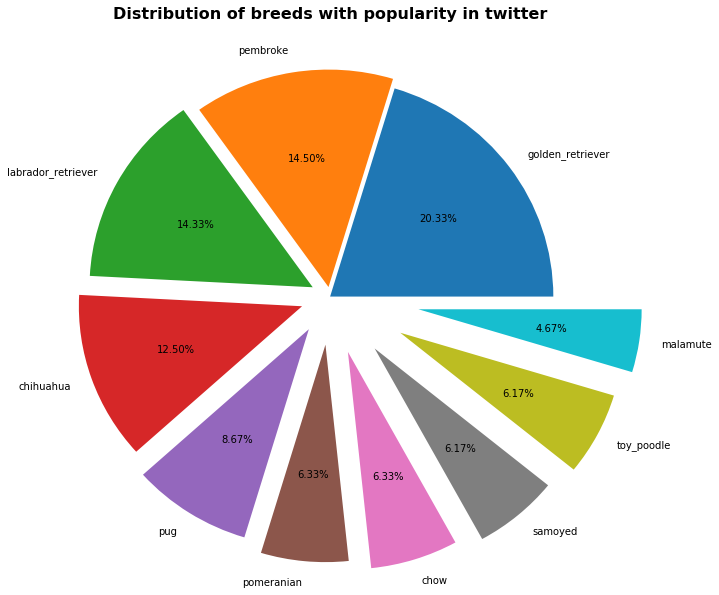

In [108]:
breed_count = master['p1'].value_counts().head(10)
breed_count

# Shows the repartition of the breeds with a pie chart.
explode = np.linspace(0,0.4,10)
breed_count.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(10,10), explode=explode)
plt.ylabel('')
plt.title('Distribution of breeds with popularity in twitter', weight='bold', fontsize=16)
plt.savefig('breed_distribution.png')

#### Insight 2

In [109]:
sources_count = master['source'].value_counts()


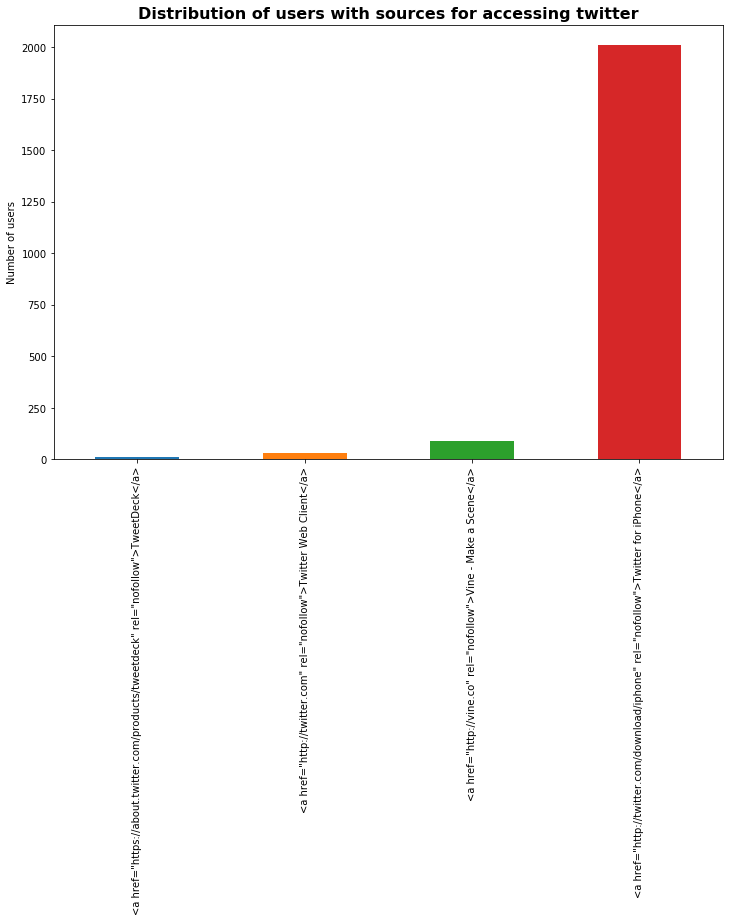

In [110]:
sources_count.sort_values().plot.bar(figsize = (12,8))
plt.ylabel('Source')
plt.ylabel('Number of users')
plt.title('Distribution of users with sources for accessing twitter', weight='bold', fontsize=16)
plt.savefig('sources.png')

#### Insight 3 

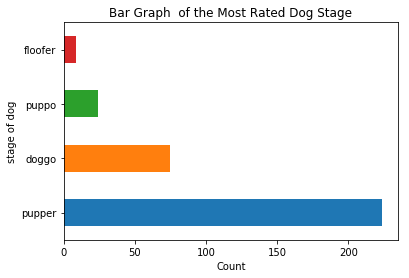

In [111]:
df_dog_stage = master.groupby('dog_stage').filter(lambda x: len(x) >= 0)

df_dog_stage['dog_stage'].value_counts().plot(kind = 'barh')
plt.title('Bar Graph  of the Most Rated Dog Stage')
plt.xlabel('Count')
plt.ylabel('stage of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [112]:
master.dog_stage.value_counts()

pupper     224
doggo       75
puppo       24
floofer      9
Name: dog_stage, dtype: int64

In [113]:
time = master[['timestamp', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator']].copy()

In [114]:
 #Create rating_ration variable by dividing the rating numerator by the deonominator to normalize scores which are not out of 10
time['rating_ratio'] = time['rating_numerator']/time['rating_denominator']

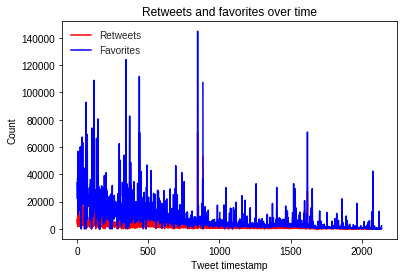

In [115]:
time['retweet_count'].plot(color = 'red', label='Retweets')
time['favorite_count'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()
